In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import random

In [ ]:
tf.random.set_seed(30)
np.random.seed(30)
random.seed(30)

In [ ]:
df = pd.read_csv("/Alabama_alcohol.csv")
df

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,...,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,TMINA,TMAXA,TAVGA,SNWDA,SNOWA,PRCPA
0,06/10/2019,Alabama,Alcohol,"$23,611,285","2,974,221","837,930","$22,449,300","2,979,065","815,637",NaN,...,2.7,NaN,NaN,NaN,19.4,38.3,28.371429,0,0,9.9
1,13/10/2019,Alabama,Alcohol,"$23,220,758","2,895,573","830,131","$23,314,625","2,978,312","855,363",NaN,...,-2.9,NaN,NaN,NaN,11.7,30.0,21.014286,0,0,23.9
2,20/10/2019,Alabama,Alcohol,"$21,770,283","2,730,939","762,832","$21,070,374","2,745,973","766,339",NaN,...,-0.5,NaN,NaN,NaN,6.1,23.9,16.085714,0,0,7.9
3,27/10/2019,Alabama,Alcohol,"$21,956,558","2,764,970","768,366","$20,188,919","2,651,957","713,812",NaN,...,7.6,NaN,NaN,NaN,5.6,23.9,17.242857,0,0,56.7
4,03/11/2019,Alabama,Alcohol,"$23,183,482","2,872,683","815,352","$22,565,261","2,884,813","801,717",NaN,...,1.7,NaN,NaN,NaN,-1.0,23.3,12.228571,0,0,101.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,20/11/2022,Alabama,Alcohol,"$25,440,091","2,822,935","702,451","$25,639,562","2,993,795","778,847","$22,163,189",...,-9.8,14.8,2.1,-6.7,-3.8,13.9,5.071429,0,0,20.1
164,27/11/2022,Alabama,Alcohol,"$29,502,702","3,140,717","833,036","$29,047,292","3,166,039","884,479","$27,789,772",...,-5.8,6.2,-2.5,-13.3,-3.8,21.7,12.000000,0,0,18.6
165,04/12/2022,Alabama,Alcohol,"$24,797,763","2,848,154","686,429","$23,810,938","2,803,972","732,203","$20,495,494",...,-6.3,21.0,9.8,-2.6,-1.0,22.8,12.085714,0,0,108.7
166,11/12/2022,Alabama,Alcohol,"$25,391,276","2,875,439","718,306","$23,580,415","2,773,061","713,841","$20,781,878",...,0.6,22.2,10.8,4.4,10.6,25.0,17.957143,0,0,42.2


In [ ]:
df['Unit sales'] = df['Unit sales'].str.replace(',', '').astype(int)


In [ ]:
df.index = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,...,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,TMINA,TMAXA,TAVGA,SNWDA,SNOWA,PRCPA
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-06,06/10/2019,Alabama,Alcohol,"$23,611,285",2974221,"837,930","$22,449,300","2,979,065","815,637",NaN,...,2.7,NaN,NaN,NaN,19.4,38.3,28.371429,0,0,9.9
2019-10-13,13/10/2019,Alabama,Alcohol,"$23,220,758",2895573,"830,131","$23,314,625","2,978,312","855,363",NaN,...,-2.9,NaN,NaN,NaN,11.7,30.0,21.014286,0,0,23.9
2019-10-20,20/10/2019,Alabama,Alcohol,"$21,770,283",2730939,"762,832","$21,070,374","2,745,973","766,339",NaN,...,-0.5,NaN,NaN,NaN,6.1,23.9,16.085714,0,0,7.9
2019-10-27,27/10/2019,Alabama,Alcohol,"$21,956,558",2764970,"768,366","$20,188,919","2,651,957","713,812",NaN,...,7.6,NaN,NaN,NaN,5.6,23.9,17.242857,0,0,56.7
2019-11-03,03/11/2019,Alabama,Alcohol,"$23,183,482",2872683,"815,352","$22,565,261","2,884,813","801,717",NaN,...,1.7,NaN,NaN,NaN,-1.0,23.3,12.228571,0,0,101.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-20,20/11/2022,Alabama,Alcohol,"$25,440,091",2822935,"702,451","$25,639,562","2,993,795","778,847","$22,163,189",...,-9.8,14.8,2.1,-6.7,-3.8,13.9,5.071429,0,0,20.1
2022-11-27,27/11/2022,Alabama,Alcohol,"$29,502,702",3140717,"833,036","$29,047,292","3,166,039","884,479","$27,789,772",...,-5.8,6.2,-2.5,-13.3,-3.8,21.7,12.000000,0,0,18.6
2022-12-04,04/12/2022,Alabama,Alcohol,"$24,797,763",2848154,"686,429","$23,810,938","2,803,972","732,203","$20,495,494",...,-6.3,21.0,9.8,-2.6,-1.0,22.8,12.085714,0,0,108.7


In [ ]:
df = df.drop("Date", axis = 1)
df = df.drop("Dollars", axis = 1)
df = df.drop("Volume sales", axis = 1)
df = df.drop("Dollars last year", axis = 1)
df = df.drop("Unit sales last year", axis = 1)
df = df.drop("Volume sales last year", axis = 1)
df = df.drop("Dollars 3 years ago", axis = 1)
df = df.drop("Unit sales 3 years ago", axis = 1)
df = df.drop("Volume sales 3 years ago", axis = 1)
df = df.drop("Percent change dollars 1 year", axis = 1)
df = df.drop("Percent change units 1 year", axis = 1)
df = df.drop("Percent change volume 1 year", axis = 1)
df = df.drop("Percent change dollars 3 years", axis = 1)
df = df.drop("Percent change units 3 years", axis = 1)
df = df.drop("Percent change volume 3 years", axis = 1)
df = df.drop("State", axis = 1)
df = df.drop("Category", axis = 1)
#------------- Remove this in case the state presents snowy days ---------------
df = df.drop("SNOWA", axis = 1)
df = df.drop("SNWDA", axis = 1)
#---------------------------------------------------------------------------
df

,Unit sales,TMINA,TMAXA,TAVGA,PRCPA
Date,,,,,
2019-10-06,2974221,19.4,38.3,28.371429,9.9
2019-10-13,2895573,11.7,30.0,21.014286,23.9
2019-10-20,2730939,6.1,23.9,16.085714,7.9
2019-10-27,2764970,5.6,23.9,17.242857,56.7
2019-11-03,2872683,-1.0,23.3,12.228571,101.2
...,...,...,...,...,...
2022-11-20,2822935,-3.8,13.9,5.071429,20.1
2022-11-27,3140717,-3.8,21.7,12.000000,18.6
2022-12-04,2848154,-1.0,22.8,12.085714,108.7


In [ ]:
#--------------------- LSTM ----------------------------------------------------

In [ ]:
def df_to_X_y(df, window_size = 6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i + window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X, y = df_to_X_y(df)
X.shape, y.shape

((162, 6, 5), (162,))

In [ ]:
X_train, y_train = X[:142], y[:142]
X_val, y_val = X[142:152], y[142:152]
X_test, y_test = X[152:], y[152:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((142, 6, 5), (142,), (10, 6, 5), (10,), (10, 6, 5), (10,))

In [ ]:
#--- For the input
# function for standardizing the Unit sales
unit_sales_train_mean = np.mean(X_train[:, :, 0])
unit_sales_train_std = np.std(X_train[:, :, 0])

def standardization_units(X):
  X[:, :, 0] = (X[:, :, 0] - unit_sales_train_mean) / unit_sales_train_std
  return X
# function for standardizing the	TMINA
TMINA_train_mean = np.mean(X_train[:, :, 1])
TMINA_train_std = np.std(X_train[:, :, 1])

def standardization_TMINA(X):
  X[:, :, 1] = (X[:, :, 1] - TMINA_train_mean) / TMINA_train_std
  return X
# function for standardizing the	TMAXA
TMAXA_train_mean = np.mean(X_train[:, :, 2])
TMAXA_train_std = np.std(X_train[:, :, 2])

def standardization_TMAXA(X):
  X[:, :, 2] = (X[:, :, 2] - TMAXA_train_mean) / TMAXA_train_std
  return X
# function for standardizing the	TAVGA
TAVGA_train_mean = np.mean(X_train[:, :, 3])
TAVGA_train_std = np.std(X_train[:, :, 3])

def standardization_TAVGA(X):
  X[:, :, 3] = (X[:, :, 3] - TAVGA_train_mean) / TAVGA_train_std
  return X
# function for standardizing the	PRCPA
PRCPA_train_mean = np.mean(X_train[:, :, 4])
PRCPA_train_std = np.std(X_train[:, :, 4])

def standardization_PRCPA(X):
  X[:, :, 4] = (X[:, :, 4] - PRCPA_train_mean) / PRCPA_train_std
  return X



In [ ]:
#--- For the output
def standardization_units(Y):
  Y[:] = (Y[:] - unit_sales_train_mean) / unit_sales_train_std
  return Y

In [ ]:
standardization_units(X_train)
standardization_TMINA(X_train)
standardization_TMAXA(X_train)
standardization_TAVGA(X_train)
standardization_PRCPA(X_train)
standardization_units(X_val)
standardization_TMINA(X_val)
standardization_TMAXA(X_val)
standardization_TAVGA(X_val)
standardization_PRCPA(X_val)
standardization_units(X_test)
standardization_TMINA(X_test)
standardization_TMAXA(X_test)
standardization_TAVGA(X_test)
standardization_PRCPA(X_test)

array([[[ 1.79437413, -2.46421678, -7.23035108, -4.47535312,
         -1.38351206],
        [ 0.75022977, -2.46421706, -7.23035339, -4.47535451,
         -1.38351552],
        [ 2.16150392, -2.46422046, -7.2303539 , -4.47535551,
         -1.38351753],
        [ 1.20527621, -2.46421923, -7.23034911, -4.47535413,
         -1.38351742],
        [ 1.48592401, -2.46422325, -7.23035536, -4.47535877,
         -1.38351753],
        [ 1.03455974, -2.46422386, -7.23035484, -4.47535871,
         -1.38351753]],

       [[ 0.75022977, -2.46421706, -7.23035339, -4.47535451,
         -1.38351552],
        [ 2.16150392, -2.46422046, -7.2303539 , -4.47535551,
         -1.38351753],
        [ 1.20527621, -2.46421923, -7.23034911, -4.47535413,
         -1.38351742],
        [ 1.48592401, -2.46422325, -7.23035536, -4.47535877,
         -1.38351753],
        [ 1.03455974, -2.46422386, -7.23035484, -4.47535871,
         -1.38351753],
        [ 0.22770956, -2.46422386, -7.23035536, -4.47535865,
         -1.3

In [ ]:
standardization_units(y_train)
standardization_units(y_val)
standardization_units(y_test)

array([ 0.22770956, -0.21675065, -0.03353831,  0.36702478,  0.59821303,
       -0.40857594,  1.14744365, -0.2850911 , -0.1514901 ,  0.11400793])

In [ ]:
from keras.engine.input_layer import InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2



In [ ]:
model = Sequential()
model.add(InputLayer((6, 5)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 30,609
Trainable params: 30,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model/', save_best_only = True)
model.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate = 0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, callbacks=[cp])

Epoch 1/50
1/5 [=====>........................] - ETA: 45s - loss: 1.2591 - root_mean_squared_error: 1.1221

5/5 [==============================] - 26s 4s/step - loss: 1.0067 - root_mean_squared_error: 1.0033 - val_loss: 1.3647 - val_root_mean_squared_error: 1.1682
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.9792 - root_mean_squared_error: 0.9895 - val_loss: 1.4245 - val_root_mean_squared_error: 1.1935
Epoch 3/50
5/5 [==============================] - 0s 14ms/step - loss: 0.9453 - root_mean_squared_error: 0.9723 - val_loss: 1.3845 - val_root_mean_squared_error: 1.1767
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 0.9154 - root_mean_squared_error: 0.9568 - val_loss: 1.4331 - val_root_mean_squared_error: 1.1971
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.8818 - root_mean_squared_error: 0.9390 - val_loss: 1.4167 - val_root_mean_squared_error: 1.1902
Epoch 6/50
1/5 [=====>........................] - ETA: 0s - loss: 1.0575 - root_mean_squared_error: 1.0284

5/5 [==============================] - 8s 2s/step - loss: 0.8507 - root_mean_squared_error: 0.9223 - val_loss: 1.3513 - val_root_mean_squared_error: 1.1625
Epoch 7/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6887 - root_mean_squared_error: 0.8299

5/5 [==============================] - 8s 2s/step - loss: 0.8325 - root_mean_squared_error: 0.9124 - val_loss: 1.3297 - val_root_mean_squared_error: 1.1531
Epoch 8/50
1/5 [=====>........................] - ETA: 0s - loss: 0.9302 - root_mean_squared_error: 0.9645

5/5 [==============================] - 7s 2s/step - loss: 0.8440 - root_mean_squared_error: 0.9187 - val_loss: 1.3193 - val_root_mean_squared_error: 1.1486
Epoch 9/50
1/5 [=====>........................] - ETA: 0s - loss: 1.0846 - root_mean_squared_error: 1.0415

5/5 [==============================] - 8s 2s/step - loss: 0.8215 - root_mean_squared_error: 0.9064 - val_loss: 1.3192 - val_root_mean_squared_error: 1.1486
Epoch 10/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7620 - root_mean_squared_error: 0.8729

5/5 [==============================] - 8s 2s/step - loss: 0.8164 - root_mean_squared_error: 0.9035 - val_loss: 1.3023 - val_root_mean_squared_error: 1.1412
Epoch 11/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6176 - root_mean_squared_error: 0.7859

5/5 [==============================] - 8s 2s/step - loss: 0.8081 - root_mean_squared_error: 0.8989 - val_loss: 1.2920 - val_root_mean_squared_error: 1.1367
Epoch 12/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6418 - root_mean_squared_error: 0.8011

5/5 [==============================] - 8s 2s/step - loss: 0.8174 - root_mean_squared_error: 0.9041 - val_loss: 1.2878 - val_root_mean_squared_error: 1.1348
Epoch 13/50
1/5 [=====>........................] - ETA: 0s - loss: 0.9722 - root_mean_squared_error: 0.9860

5/5 [==============================] - 7s 2s/step - loss: 0.7913 - root_mean_squared_error: 0.8895 - val_loss: 1.2861 - val_root_mean_squared_error: 1.1341
Epoch 14/50
1/5 [=====>........................] - ETA: 0s - loss: 0.9316 - root_mean_squared_error: 0.9652

5/5 [==============================] - 8s 2s/step - loss: 0.7832 - root_mean_squared_error: 0.8850 - val_loss: 1.2665 - val_root_mean_squared_error: 1.1254
Epoch 15/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5545 - root_mean_squared_error: 0.7446

5/5 [==============================] - 8s 2s/step - loss: 0.7798 - root_mean_squared_error: 0.8831 - val_loss: 1.2599 - val_root_mean_squared_error: 1.1225
Epoch 16/50
5/5 [==============================] - 0s 18ms/step - loss: 0.7831 - root_mean_squared_error: 0.8849 - val_loss: 1.2657 - val_root_mean_squared_error: 1.1250
Epoch 17/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5535 - root_mean_squared_error: 0.7440

5/5 [==============================] - 7s 2s/step - loss: 0.7669 - root_mean_squared_error: 0.8757 - val_loss: 1.2417 - val_root_mean_squared_error: 1.1143
Epoch 18/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6563 - root_mean_squared_error: 0.8102

5/5 [==============================] - 8s 2s/step - loss: 0.7661 - root_mean_squared_error: 0.8753 - val_loss: 1.2339 - val_root_mean_squared_error: 1.1108
Epoch 19/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7480 - root_mean_squared_error: 0.8649

5/5 [==============================] - 10s 2s/step - loss: 0.7544 - root_mean_squared_error: 0.8686 - val_loss: 1.2303 - val_root_mean_squared_error: 1.1092
Epoch 20/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5096 - root_mean_squared_error: 0.7139

5/5 [==============================] - 7s 2s/step - loss: 0.7480 - root_mean_squared_error: 0.8649 - val_loss: 1.2178 - val_root_mean_squared_error: 1.1035
Epoch 21/50
1/5 [=====>........................] - ETA: 0s - loss: 1.0402 - root_mean_squared_error: 1.0199

5/5 [==============================] - 8s 2s/step - loss: 0.7421 - root_mean_squared_error: 0.8614 - val_loss: 1.2154 - val_root_mean_squared_error: 1.1024
Epoch 22/50
1/5 [=====>........................] - ETA: 0s - loss: 1.0536 - root_mean_squared_error: 1.0264

5/5 [==============================] - 8s 2s/step - loss: 0.7607 - root_mean_squared_error: 0.8722 - val_loss: 1.2045 - val_root_mean_squared_error: 1.0975
Epoch 23/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6894 - root_mean_squared_error: 0.8303

5/5 [==============================] - 7s 2s/step - loss: 0.7256 - root_mean_squared_error: 0.8518 - val_loss: 1.1940 - val_root_mean_squared_error: 1.0927
Epoch 24/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5309 - root_mean_squared_error: 0.7286

5/5 [==============================] - 8s 2s/step - loss: 0.7318 - root_mean_squared_error: 0.8554 - val_loss: 1.1870 - val_root_mean_squared_error: 1.0895
Epoch 25/50
5/5 [==============================] - 0s 13ms/step - loss: 0.7238 - root_mean_squared_error: 0.8508 - val_loss: 1.1957 - val_root_mean_squared_error: 1.0935
Epoch 26/50
1/5 [=====>........................] - ETA: 0s - loss: 0.8187 - root_mean_squared_error: 0.9048

5/5 [==============================] - 8s 2s/step - loss: 0.7112 - root_mean_squared_error: 0.8433 - val_loss: 1.1712 - val_root_mean_squared_error: 1.0822
Epoch 27/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6248 - root_mean_squared_error: 0.7905

5/5 [==============================] - 8s 2s/step - loss: 0.7117 - root_mean_squared_error: 0.8436 - val_loss: 1.1637 - val_root_mean_squared_error: 1.0788
Epoch 28/50
5/5 [==============================] - 0s 18ms/step - loss: 0.7074 - root_mean_squared_error: 0.8411 - val_loss: 1.1790 - val_root_mean_squared_error: 1.0858
Epoch 29/50
1/5 [=====>........................] - ETA: 0s - loss: 0.4454 - root_mean_squared_error: 0.6674

5/5 [==============================] - 8s 2s/step - loss: 0.6934 - root_mean_squared_error: 0.8327 - val_loss: 1.1490 - val_root_mean_squared_error: 1.0719
Epoch 30/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5316 - root_mean_squared_error: 0.7291

5/5 [==============================] - 7s 2s/step - loss: 0.7044 - root_mean_squared_error: 0.8393 - val_loss: 1.1423 - val_root_mean_squared_error: 1.0688
Epoch 31/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6107 - root_mean_squared_error: 0.7815

5/5 [==============================] - 8s 2s/step - loss: 0.6828 - root_mean_squared_error: 0.8263 - val_loss: 1.1354 - val_root_mean_squared_error: 1.0656
Epoch 32/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5824 - root_mean_squared_error: 0.7632

5/5 [==============================] - 8s 2s/step - loss: 0.6760 - root_mean_squared_error: 0.8222 - val_loss: 1.1310 - val_root_mean_squared_error: 1.0635
Epoch 33/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5280 - root_mean_squared_error: 0.7267

5/5 [==============================] - 8s 2s/step - loss: 0.6742 - root_mean_squared_error: 0.8211 - val_loss: 1.1211 - val_root_mean_squared_error: 1.0588
Epoch 34/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7576 - root_mean_squared_error: 0.8704

5/5 [==============================] - 8s 2s/step - loss: 0.6692 - root_mean_squared_error: 0.8181 - val_loss: 1.1140 - val_root_mean_squared_error: 1.0555
Epoch 35/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5933 - root_mean_squared_error: 0.7703

5/5 [==============================] - 8s 2s/step - loss: 0.6702 - root_mean_squared_error: 0.8187 - val_loss: 1.1073 - val_root_mean_squared_error: 1.0523
Epoch 36/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6178 - root_mean_squared_error: 0.7860

5/5 [==============================] - 7s 2s/step - loss: 0.6836 - root_mean_squared_error: 0.8268 - val_loss: 1.1002 - val_root_mean_squared_error: 1.0489
Epoch 37/50
5/5 [==============================] - 0s 14ms/step - loss: 0.6692 - root_mean_squared_error: 0.8180 - val_loss: 1.1122 - val_root_mean_squared_error: 1.0546
Epoch 38/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6881 - root_mean_squared_error: 0.8295

5/5 [==============================] - 9s 2s/step - loss: 0.6558 - root_mean_squared_error: 0.8098 - val_loss: 1.0883 - val_root_mean_squared_error: 1.0432
Epoch 39/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6232 - root_mean_squared_error: 0.7894

5/5 [==============================] - 7s 2s/step - loss: 0.6522 - root_mean_squared_error: 0.8076 - val_loss: 1.0818 - val_root_mean_squared_error: 1.0401
Epoch 40/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6706 - root_mean_squared_error: 0.8189

5/5 [==============================] - 8s 2s/step - loss: 0.6481 - root_mean_squared_error: 0.8051 - val_loss: 1.0756 - val_root_mean_squared_error: 1.0371
Epoch 41/50
1/5 [=====>........................] - ETA: 0s - loss: 0.4132 - root_mean_squared_error: 0.6428

5/5 [==============================] - 8s 2s/step - loss: 0.6403 - root_mean_squared_error: 0.8002 - val_loss: 1.0691 - val_root_mean_squared_error: 1.0340
Epoch 42/50
1/5 [=====>........................] - ETA: 0s - loss: 0.4688 - root_mean_squared_error: 0.6847

5/5 [==============================] - 7s 2s/step - loss: 0.6338 - root_mean_squared_error: 0.7961 - val_loss: 1.0629 - val_root_mean_squared_error: 1.0310
Epoch 43/50
1/5 [=====>........................] - ETA: 0s - loss: 0.8825 - root_mean_squared_error: 0.9394

5/5 [==============================] - 8s 2s/step - loss: 0.6287 - root_mean_squared_error: 0.7929 - val_loss: 1.0566 - val_root_mean_squared_error: 1.0279
Epoch 44/50
1/5 [=====>........................] - ETA: 0s - loss: 0.3755 - root_mean_squared_error: 0.6128

5/5 [==============================] - 8s 2s/step - loss: 0.6242 - root_mean_squared_error: 0.7901 - val_loss: 1.0508 - val_root_mean_squared_error: 1.0251
Epoch 45/50
1/5 [=====>........................] - ETA: 0s - loss: 0.8857 - root_mean_squared_error: 0.9411

5/5 [==============================] - 7s 2s/step - loss: 0.6183 - root_mean_squared_error: 0.7863 - val_loss: 1.0450 - val_root_mean_squared_error: 1.0222
Epoch 46/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6216 - root_mean_squared_error: 0.7884

5/5 [==============================] - 8s 2s/step - loss: 0.6067 - root_mean_squared_error: 0.7789 - val_loss: 1.0392 - val_root_mean_squared_error: 1.0194
Epoch 47/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7149 - root_mean_squared_error: 0.8455

5/5 [==============================] - 8s 2s/step - loss: 0.6124 - root_mean_squared_error: 0.7826 - val_loss: 1.0331 - val_root_mean_squared_error: 1.0164
Epoch 48/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5561 - root_mean_squared_error: 0.7457

5/5 [==============================] - 8s 2s/step - loss: 0.6121 - root_mean_squared_error: 0.7824 - val_loss: 1.0276 - val_root_mean_squared_error: 1.0137
Epoch 49/50
1/5 [=====>........................] - ETA: 0s - loss: 0.7193 - root_mean_squared_error: 0.8481

5/5 [==============================] - 8s 2s/step - loss: 0.6157 - root_mean_squared_error: 0.7847 - val_loss: 0.9730 - val_root_mean_squared_error: 0.9864
Epoch 50/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6450 - root_mean_squared_error: 0.8031

5/5 [==============================] - 7s 2s/step - loss: 0.5736 - root_mean_squared_error: 0.7574 - val_loss: 0.8521 - val_root_mean_squared_error: 0.9231


In [ ]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data ={'Test predictions': test_predictions, 'Actual': y_test})
test_results

1/1 [==============================] - 1s 725ms/step


,Test predictions,Actual
0,0.319644,0.227710
1,0.334425,-0.216751
2,0.270618,-0.033538
3,0.245233,0.367025
4,0.311132,0.598213
5,0.305008,-0.408576
6,-0.152925,1.147444
7,0.294335,-0.285091
8,-0.102586,-0.151490
9,0.144892,0.114008


In [ ]:
def postprocess(arr):
  arr = (arr*unit_sales_train_std) + unit_sales_train_mean
  return arr

In [ ]:
post_test_results = postprocess(test_results)
print(post_test_results)

   Test predictions     Actual
0        2971657.75  2952882.0
1        2974676.25  2862111.0
2        2961645.25  2899528.0
3        2956460.75  2981334.0
4        2969919.25  3028549.0
5        2968668.50  2822935.0
6        2875146.00  3140717.0
7        2966488.75  2848154.0
8        2885426.50  2875439.0
9        2935968.50  2929661.0


In [ ]:
#--- Mean absolute percentage error

def calculate_mape(actual_values, predicted_values):

    absolute_errors = []
    for actual, predicted in zip(actual_values, predicted_values):
        absolute_errors.append(abs(actual - predicted) / actual)

    mape = (sum(absolute_errors) / len(absolute_errors)) * 100
    return mape

mape_lstm = calculate_mape(post_test_results['Actual'], post_test_results['Test predictions'])
print(mape_lstm)

2.781696411872047


In [ ]:
#--- Mean bias error

def calculate_mbe(actual_values, predicted_values):

    errors = []
    for actual, predicted in zip(actual_values, predicted_values):
        errors.append(predicted - actual)

    mbe = sum(errors) / len(errors)
    return mbe

mbe_lstm = calculate_mbe(post_test_results['Actual'], post_test_results['Test predictions'])
print(mbe_lstm)

12474.75


In [ ]:
#--- Root mean squared error

def calculate_rmse(actual_values, predicted_values):

    squared_errors = []
    for actual, predicted in zip(actual_values, predicted_values):
        squared_errors.append((predicted - actual) ** 2)

    mse = sum(squared_errors) / len(squared_errors)
    rmse = math.sqrt(mse)
    return rmse

rmse_lstm = calculate_rmse(post_test_results['Actual'], post_test_results['Test predictions'])
print(rmse_lstm)

112626.37347758516


In [ ]:
test_dates = ['2022-10-16', '2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13', '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11', '2022-12-18']
test_dates = pd.to_datetime(test_dates)
post_test_results.set_index(test_dates, inplace = True)

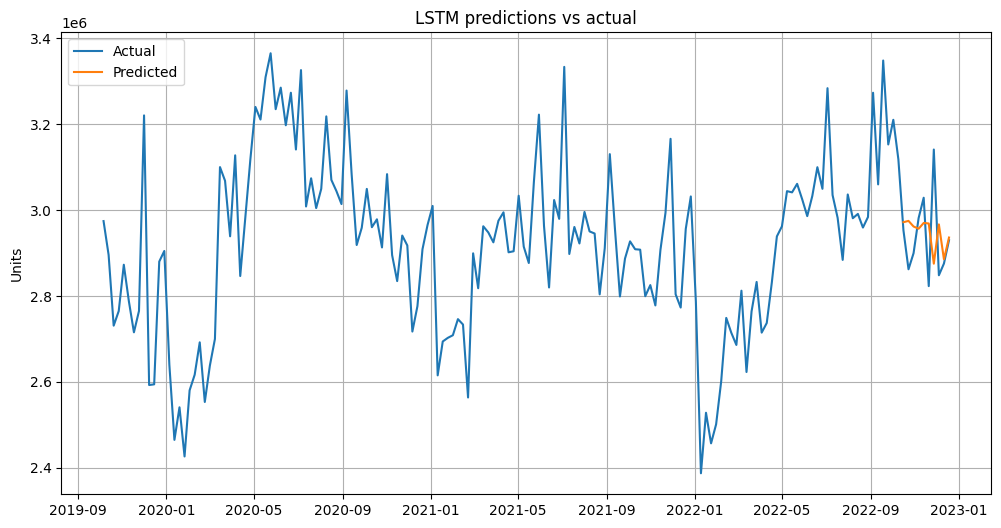

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df['Unit sales'], label= 'Actual')
plt.plot(post_test_results['Test predictions'], label = 'Predicted')
plt.ylabel('Units')
plt.title('LSTM predictions vs actual')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#--------------------- GRU ----------------------------------------------------

In [ ]:
from tensorflow.keras.layers import GRU, Conv1D, Flatten

In [ ]:
model_gru = Sequential()
model_gru.add(InputLayer((6, 5)))
model_gru.add(GRU(140, activation='relu'))
model_gru.add(Flatten())
model_gru.add(Dense(8, 'relu'))
model_gru.add(Dense(1, 'linear'))
model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 140)               61740     
                                                                 
 flatten_5 (Flatten)         (None, 140)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 1128      
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 62,877
Trainable params: 62,877
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp_gru = ModelCheckpoint('model_gru/', save_best_only = True)
model_gru.compile(loss=MeanSquaredError(), optimizer = Adam(learning_rate = 0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model_gru.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, callbacks=[cp_gru])

Epoch 1/50
5/5 [==============================] - 6s 753ms/step - loss: 1.4607 - root_mean_squared_error: 1.2086 - val_loss: 2.2356 - val_root_mean_squared_error: 1.4952
Epoch 2/50
5/5 [==============================] - 2s 490ms/step - loss: 1.0847 - root_mean_squared_error: 1.0415 - val_loss: 1.2717 - val_root_mean_squared_error: 1.1277
Epoch 3/50
5/5 [==============================] - 2s 494ms/step - loss: 0.7876 - root_mean_squared_error: 0.8875 - val_loss: 0.5225 - val_root_mean_squared_error: 0.7228
Epoch 4/50
5/5 [==============================] - 0s 25ms/step - loss: 0.7363 - root_mean_squared_error: 0.8581 - val_loss: 0.7504 - val_root_mean_squared_error: 0.8663
Epoch 5/50
5/5 [==============================] - 0s 25ms/step - loss: 0.6323 - root_mean_squared_error: 0.7952 - val_loss: 0.9920 - val_root_mean_squared_error: 0.9960
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 0.6165 - root_mean_squared_error: 0.7852 - val_loss: 0.5348 - val_root_mean_squar

In [ ]:
test_predictions_gru = model_gru.predict(X_test).flatten()
#test_predictions_gru.shape
test_results_gru = pd.DataFrame(data ={'Test predictions_gru': test_predictions_gru, 'Actual': y_test})
test_results_gru

1/1 [==============================] - 0s 171ms/step


,Test predictions_gru,Actual
0,0.872390,0.227710
1,0.463993,-0.216751
2,0.096573,-0.033538
3,0.005514,0.367025
4,0.095638,0.598213
5,0.190291,-0.408576
6,-0.244404,1.147444
7,0.339642,-0.285091
8,-0.126508,-0.151490
9,-0.144136,0.114008


In [ ]:
post_test_results_gru = postprocess(test_results_gru)
print(post_test_results_gru)

   Test predictions_gru     Actual
0            3084543.50  2952882.0
1            3001137.75  2862111.0
2            2926100.25  2899528.0
3            2907503.50  2981334.0
4            2925909.25  3028549.0
5            2945240.25  2822935.0
6            2856463.50  3140717.0
7            2975741.75  2848154.0
8            2880541.25  2875439.0
9            2876941.00  2929661.0


In [ ]:
mape_gru = calculate_mape(post_test_results_gru['Actual'], post_test_results_gru['Test predictions_gru'])
print(mape_gru)

3.5937949357615406


In [ ]:
mbe_gru = calculate_mbe(post_test_results_gru['Actual'], post_test_results_gru['Test predictions_gru'])
print(mbe_gru)

3881.2


In [ ]:
rmse_gru = calculate_rmse(post_test_results_gru['Actual'], post_test_results_gru['Test predictions_gru'])
print(rmse_gru)

129691.1041757009


In [ ]:
post_test_results_gru.set_index(test_dates, inplace = True)

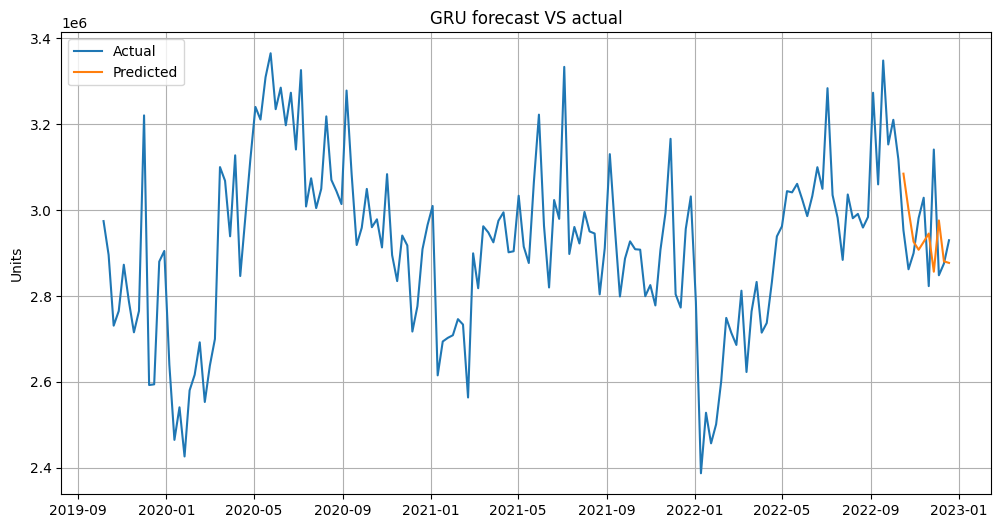

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df['Unit sales'], label= 'Actual')
plt.plot(post_test_results_gru['Test predictions_gru'], label = 'Predicted')
plt.ylabel('Units')
plt.title('GRU forecast VS actual')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#--------------------- ARIMAX ----------------------------------------------------

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


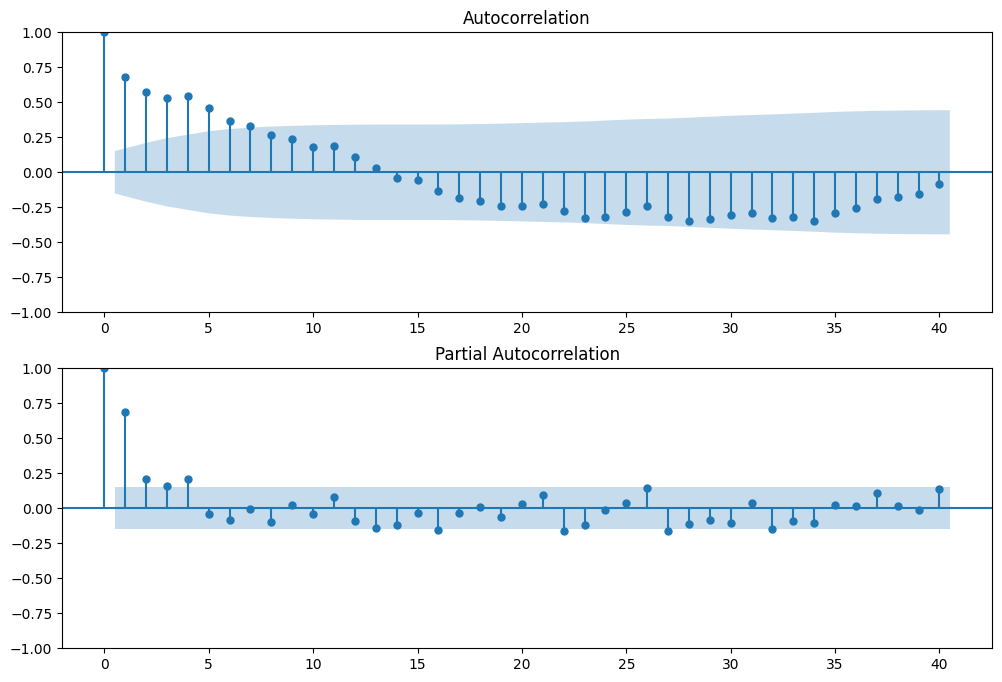

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Unit sales'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Unit sales'], lags=40, ax=ax2)
plt.show()

In [ ]:
X_arimax = df
X_arimax = X_arimax.drop("Unit sales", axis = 1)
X_arimax

,TMINA,TMAXA,TAVGA,PRCPA
Date,,,,
2019-10-06,19.4,38.3,28.371429,9.9
2019-10-13,11.7,30.0,21.014286,23.9
2019-10-20,6.1,23.9,16.085714,7.9
2019-10-27,5.6,23.9,17.242857,56.7
2019-11-03,-1.0,23.3,12.228571,101.2
...,...,...,...,...
2022-11-20,-3.8,13.9,5.071429,20.1
2022-11-27,-3.8,21.7,12.000000,18.6
2022-12-04,-1.0,22.8,12.085714,108.7


In [ ]:
y_arimax = df[['Unit sales']]
y_arimax

,Unit sales
Date,
2019-10-06,2974221
2019-10-13,2895573
2019-10-20,2730939
2019-10-27,2764970
2019-11-03,2872683
...,...
2022-11-20,2822935
2022-11-27,3140717
2022-12-04,2848154


In [ ]:
X_arimax_train, y_arimax_train = X_arimax[:158], y_arimax[:158]
X_arimax_test, y_arimax_test = X_arimax[158:], y_arimax[158:]
X_arimax_train.shape, y_arimax_train.shape, X_arimax_test.shape, y_arimax_test.shape

((158, 4), (158, 1), (10, 4), (10, 1))

In [ ]:
#--- For the exogeneous values

# function for standardizing the	TMINA
TMINA_train_mean_arimax = np.mean(X_arimax_train['TMINA'])
TMINA_train_std_arimax = np.std(X_arimax_train['TMINA'])

def standardization_TMINA_a(X):
  X['TMINA'] = (X['TMINA'] - TMINA_train_mean_arimax) / TMINA_train_std_arimax
  return X
# function for standardizing the	TMAXA
TMAXA_train_mean_arimax = np.mean(X_arimax_train['TMAXA'])
TMAXA_train_std_arimax = np.std(X_arimax_train['TMAXA'])

def standardization_TMAXA_a(X):
  X['TMAXA'] = (X['TMAXA'] - TMAXA_train_mean_arimax) / TMAXA_train_std_arimax
  return X
# function for standardizing the	TAVGA
TAVGA_train_mean_arimax = np.mean(X_arimax_train['TAVGA'])
TAVGA_train_std_arimax = np.std(X_arimax_train['TAVGA'])

def standardization_TAVGA_a(X):
  X['TAVGA'] = (X['TAVGA'] - TAVGA_train_mean_arimax) / TAVGA_train_std_arimax
  return X
# function for standardizing the	PRCPA
PRCPA_train_mean_arimax = np.mean(X_arimax_train['PRCPA'])
PRCPA_train_std_arimax = np.std(X_arimax_train['PRCPA'])

def standardization_PRCPA_a(X):
  X['PRCPA'] = (X['PRCPA'] - PRCPA_train_mean_arimax) / PRCPA_train_std_arimax
  return X

In [ ]:
#--- For the target values

unit_sales_train_mean_arimax = np.mean(y_arimax_train['Unit sales'])
unit_sales_train_std_arimax = np.std(y_arimax_train['Unit sales'])

def standardization_units_a(Y):
  Y[:] = (Y[:] - unit_sales_train_mean_arimax) / unit_sales_train_std_arimax
  return Y

In [ ]:
standardization_TMINA_a(X_arimax_train)
standardization_TMAXA_a(X_arimax_train)
standardization_TAVGA_a(X_arimax_train)
standardization_PRCPA_a(X_arimax_train)
standardization_units_a(y_arimax_train)
standardization_TMINA_a(X_arimax_test)
standardization_TMAXA_a(X_arimax_test)
standardization_TAVGA_a(X_arimax_test)
standardization_PRCPA_a(X_arimax_test)
standardization_units_a(y_arimax_test)

<ipython-input-33-81601a60bef5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TMINA'] = (X['TMINA'] - TMINA_train_mean_arimax) / TMINA_train_std_arimax
<ipython-input-33-81601a60bef5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TMAXA'] = (X['TMAXA'] - TMAXA_train_mean_arimax) / TMAXA_train_std_arimax
<ipython-input-33-81601a60bef5>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Unit sales
Date,
2022-10-16,0.156853
2022-10-23,-0.288385
2022-10-30,-0.104852
2022-11-06,0.296412
2022-11-13,0.528004
2022-11-20,-0.480546
2022-11-27,1.078196
2022-12-04,-0.356845
2022-12-11,-0.223010


In [ ]:
X_arimax_test

,TMINA,TMAXA,TAVGA,PRCPA
Date,,,,
2022-10-16,-0.305808,0.106635,-0.021500,0.500174
2022-10-23,-0.927973,-0.570771,-0.777057,-0.969854
2022-10-30,-0.494680,-0.362339,-0.241954,-0.584506
2022-11-06,0.183035,-0.171275,0.068686,-0.861385
2022-11-13,-1.161285,0.297698,-0.187843,-0.938455
2022-11-20,-1.350156,-2.394556,-1.833234,-0.396114
2022-11-27,-1.350156,-1.039744,-0.861231,-0.438931
2022-12-04,-1.039074,-0.848681,-0.849206,2.132905
2022-12-11,0.249696,-0.466555,-0.025508,0.234713


In [ ]:
order = (1, 0, 1)
order

In [ ]:
model_arimax = sm.tsa.ARIMA(y_arimax_train, exog = X_arimax_train, order = order)
arimax_results = model_arimax.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [ ]:
test_predictions_arimax = arimax_results.forecast(steps = len(X_arimax_test), exog=X_arimax_test)
test_results_arimax = pd.DataFrame(data ={'Test predictions_arimax': test_predictions_arimax, 'Actual': y_arimax_test['Unit sales']})
test_results_arimax

,Test predictions_arimax,Actual
2022-10-16,0.706110,0.156853
2022-10-23,0.269523,-0.288385
2022-10-30,0.433750,-0.104852
2022-11-06,0.382948,0.296412
2022-11-13,0.765202,0.528004
2022-11-20,-0.973333,-0.480546
2022-11-27,-0.031135,1.078196
2022-12-04,-0.315843,-0.356845
2022-12-11,-0.047594,-0.223010
2022-12-18,-0.588110,0.042952


In [ ]:
def postprocess_arimax(arr):
  arr = (arr*unit_sales_train_std_arimax) + unit_sales_train_mean_arimax
  return arr

In [ ]:
post_test_results_arimax = postprocess_arimax(test_results_arimax)
print(post_test_results_arimax)

            Test predictions_arimax     Actual
2022-10-16             3.064859e+06  2952882.0
2022-10-23             2.975852e+06  2862111.0
2022-10-30             3.009333e+06  2899528.0
2022-11-06             2.998976e+06  2981334.0
2022-11-13             3.076907e+06  3028549.0
2022-11-20             2.722470e+06  2822935.0
2022-11-27             2.914557e+06  3140717.0
2022-12-04             2.856513e+06  2848154.0
2022-12-11             2.911201e+06  2875439.0
2022-12-18             2.801006e+06  2929661.0


In [ ]:
mape_arimax = calculate_mape(post_test_results_arimax['Actual'], post_test_results_arimax['Test predictions_arimax'])
print(mape_arimax)

3.0430142196086463


In [ ]:
mbe_arimax = calculate_mbe(post_test_results_arimax['Actual'], post_test_results_arimax['Test predictions_arimax'])
print(mbe_arimax)

-963.526100317575


In [ ]:
rmse_arimax = calculate_rmse(post_test_results_arimax['Actual'], post_test_results_arimax['Test predictions_arimax'])
print(rmse_arimax)

109236.24741631733


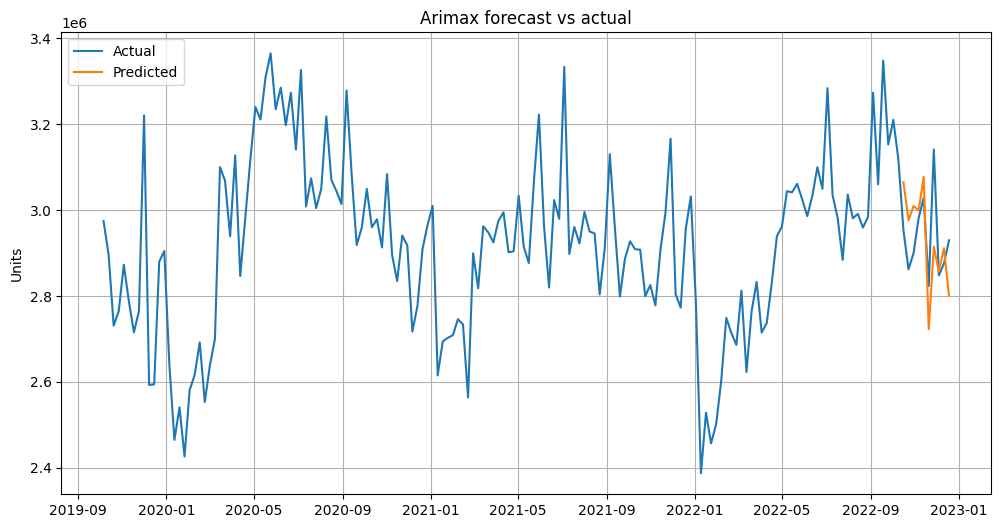

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df['Unit sales'], label= 'Actual')
plt.plot(post_test_results_arimax['Test predictions_arimax'], label = 'Predicted')
plt.ylabel('Units')
plt.title('Arimax forecast vs actual')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#--------------------- Ensemble 1 ----------------------------------------------------

In [ ]:
ensemble_actual = df['2022-10-16':]
#print(ensemble_actual)
ensemble_predictions = pd.DataFrame(data ={'Test predictions_ensemble': post_test_results_arimax['Test predictions_arimax']/2+post_test_results['Test predictions']/2, 'Actual': ensemble_actual['Unit sales']})

ensemble_predictions

,Test predictions_ensemble,Actual
2022-10-16,3.018259e+06,2952882
2022-10-23,2.975264e+06,2862111
2022-10-30,2.985489e+06,2899528
2022-11-06,2.977719e+06,2981334
2022-11-13,3.023413e+06,3028549
2022-11-20,2.845569e+06,2822935
2022-11-27,2.894851e+06,3140717
2022-12-04,2.911501e+06,2848154
2022-12-11,2.898314e+06,2875439
2022-12-18,2.868487e+06,2929661


In [ ]:
mape_ensemble = calculate_mape(ensemble_predictions['Actual'], ensemble_predictions['Test predictions_ensemble'])
print(mape_ensemble)

2.3160883477477876


In [ ]:
mbe_ensemble = calculate_mbe(ensemble_predictions['Actual'], ensemble_predictions['Test predictions_ensemble'])
print(mbe_ensemble)

5755.611949841166


In [ ]:
rmse_ensemble = calculate_rmse(ensemble_predictions['Actual'], ensemble_predictions['Test predictions_ensemble'])
print(rmse_ensemble)

96823.07405863797


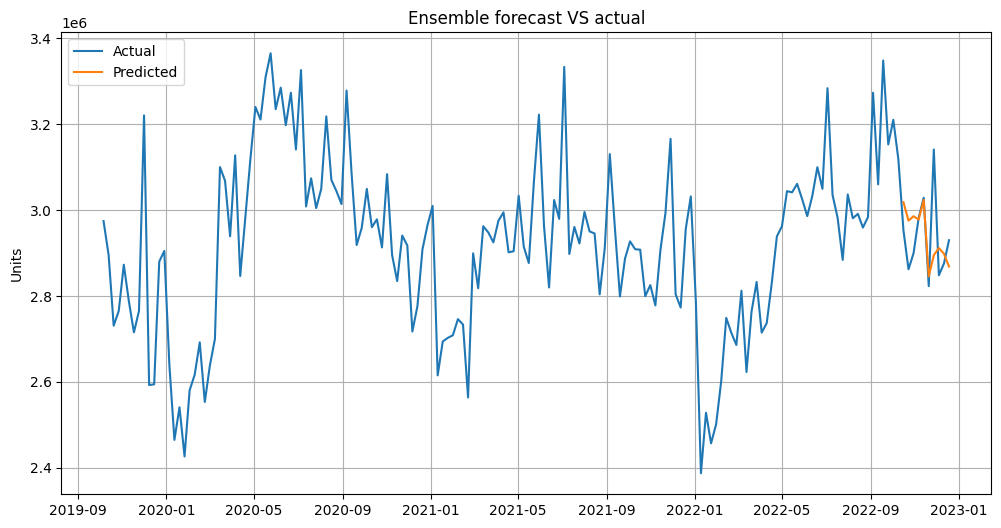

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df['Unit sales'], label= 'Actual')
plt.plot(ensemble_predictions['Test predictions_ensemble'], label = 'Predicted')
plt.ylabel('Units')
plt.title('Ensemble forecast VS actual')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#--------------------- Ensemble 2 ----------------------------------------------------

In [ ]:
ensemble2_predictions = pd.DataFrame(data ={'Test predictions_ensemble': post_test_results_arimax['Test predictions_arimax']/2+post_test_results_gru['Test predictions_gru']/2, 'Actual': ensemble_actual['Unit sales']})

ensemble2_predictions

,Test predictions_ensemble,Actual
2022-10-16,3.074701e+06,2952882
2022-10-23,2.988495e+06,2862111
2022-10-30,2.967717e+06,2899528
2022-11-06,2.953240e+06,2981334
2022-11-13,3.001408e+06,3028549
2022-11-20,2.833855e+06,2822935
2022-11-27,2.885510e+06,3140717
2022-12-04,2.916127e+06,2848154
2022-12-11,2.895871e+06,2875439
2022-12-18,2.838973e+06,2929661


In [ ]:
mape_ensemble2 = calculate_mape(ensemble2_predictions['Actual'], ensemble2_predictions['Test predictions_ensemble'])
print(mape_ensemble2)

2.7436674044367053


In [ ]:
mbe_ensemble2 = calculate_mbe(ensemble2_predictions['Actual'], ensemble2_predictions['Test predictions_ensemble'])
print(mbe_ensemble2)

1458.836949841166


In [ ]:
rmse_ensemble2 = calculate_rmse(ensemble2_predictions['Actual'], ensemble2_predictions['Test predictions_ensemble'])
print(rmse_ensemble2)

107471.11704340133


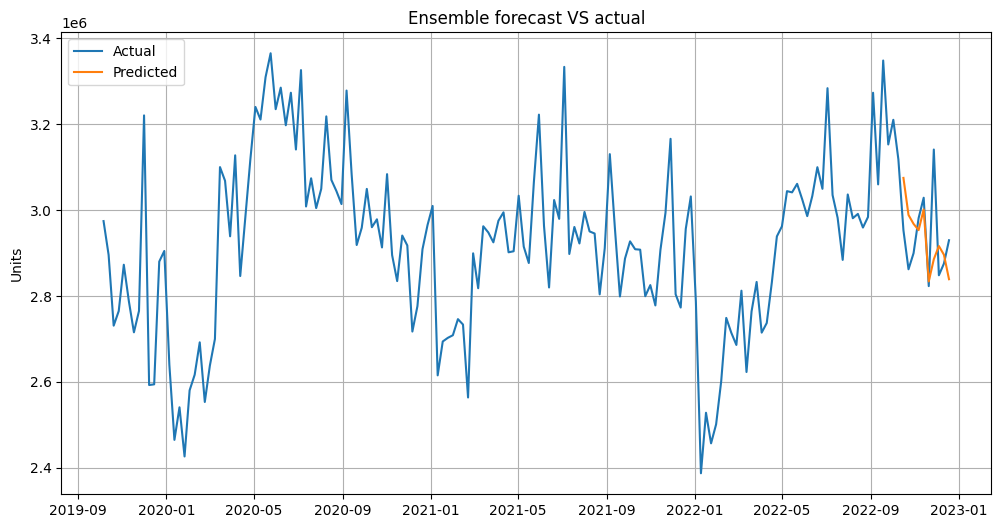

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df['Unit sales'], label= 'Actual')
plt.plot(ensemble2_predictions['Test predictions_ensemble'], label = 'Predicted')
plt.ylabel('Units')
plt.title('Ensemble forecast VS actual')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#--------------------- Ensemble 3 ----------------------------------------------------

In [ ]:
ensemble3_predictions = pd.DataFrame(data ={'Test predictions_ensemble': post_test_results_arimax['Test predictions_arimax']/3+post_test_results['Test predictions']/3+post_test_results_gru['Test predictions_gru']/3, 'Actual': ensemble_actual['Unit sales']})

ensemble3_predictions

,Test predictions_ensemble,Actual
2022-10-16,3.040354e+06,2952882
2022-10-23,2.983889e+06,2862111
2022-10-30,2.965693e+06,2899528
2022-11-06,2.954314e+06,2981334
2022-11-13,2.990912e+06,3028549
2022-11-20,2.878793e+06,2822935
2022-11-27,2.882055e+06,3140717
2022-12-04,2.932915e+06,2848154
2022-12-11,2.892390e+06,2875439
2022-12-18,2.871305e+06,2929661


In [ ]:
mape_ensemble3 = calculate_mape(ensemble3_predictions['Actual'], ensemble3_predictions['Test predictions_ensemble'])
print(mape_ensemble3)

2.741990683281493


In [ ]:
mbe_ensemble3 = calculate_mbe(ensemble3_predictions['Actual'], ensemble3_predictions['Test predictions_ensemble'])
print(mbe_ensemble3)

5130.803799894219


In [ ]:
rmse_ensemble3 = calculate_rmse(ensemble3_predictions['Actual'], ensemble3_predictions['Test predictions_ensemble'])
print(rmse_ensemble3)

104837.28278416104


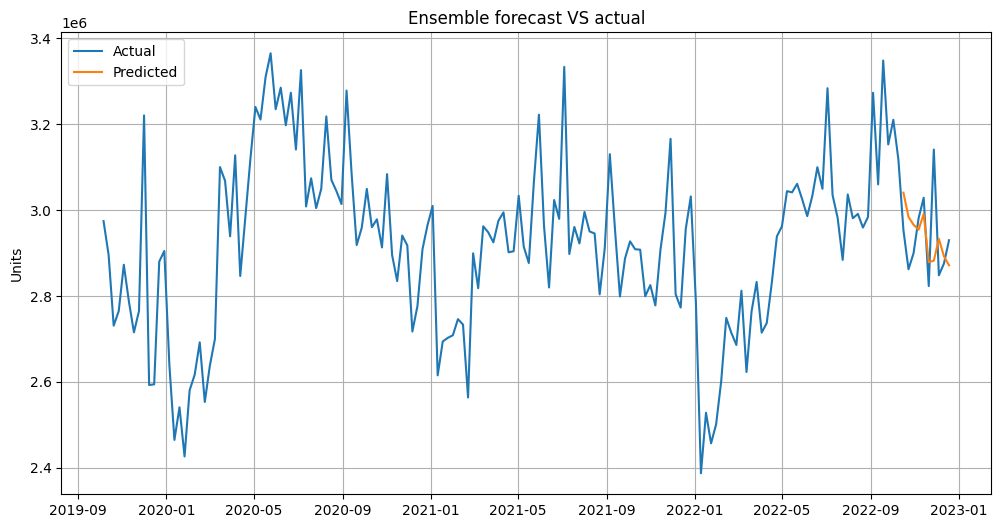

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df['Unit sales'], label= 'Actual')
plt.plot(ensemble3_predictions['Test predictions_ensemble'], label = 'Predicted')
plt.ylabel('Units')
plt.title('Ensemble forecast VS actual')
plt.legend()
plt.grid(True)
plt.show()

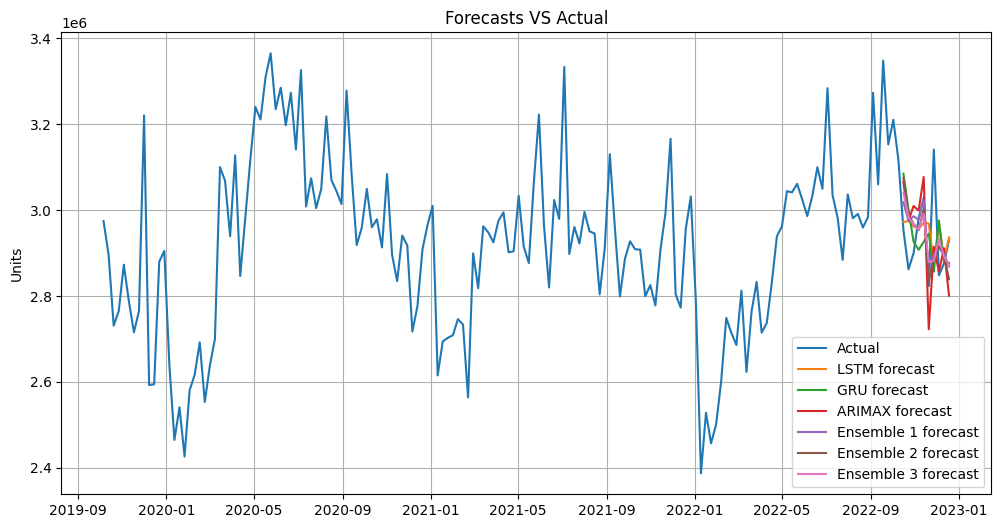

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(df['Unit sales'], label= 'Actual')
plt.plot(post_test_results['Test predictions'], label = 'LSTM forecast')
plt.plot(post_test_results_gru['Test predictions_gru'], label = 'GRU forecast')
plt.plot(post_test_results_arimax['Test predictions_arimax'], label = 'ARIMAX forecast')
plt.plot(ensemble_predictions['Test predictions_ensemble'], label = 'Ensemble 1 forecast')
plt.plot(ensemble2_predictions['Test predictions_ensemble'], label = 'Ensemble 2 forecast')
plt.plot(ensemble3_predictions['Test predictions_ensemble'], label = 'Ensemble 3 forecast')
plt.ylabel('Units')
plt.title('Forecasts VS Actual')
plt.legend()
plt.grid(True)
plt.show()

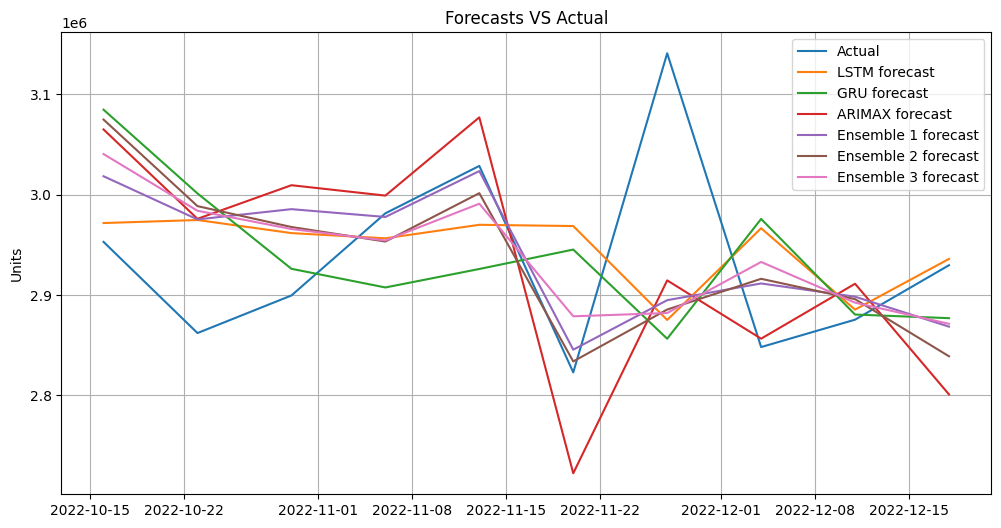

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(post_test_results['Actual'], label= 'Actual')
plt.plot(post_test_results['Test predictions'], label = 'LSTM forecast')
plt.plot(post_test_results_gru['Test predictions_gru'], label = 'GRU forecast')
plt.plot(post_test_results_arimax['Test predictions_arimax'], label = 'ARIMAX forecast')
plt.plot(ensemble_predictions['Test predictions_ensemble'], label = 'Ensemble 1 forecast')
plt.plot(ensemble2_predictions['Test predictions_ensemble'], label = 'Ensemble 2 forecast')
plt.plot(ensemble3_predictions['Test predictions_ensemble'], label = 'Ensemble 3 forecast')
plt.ylabel('Units')
plt.title('Forecasts VS Actual')
plt.legend()
plt.grid(True)
plt.show()

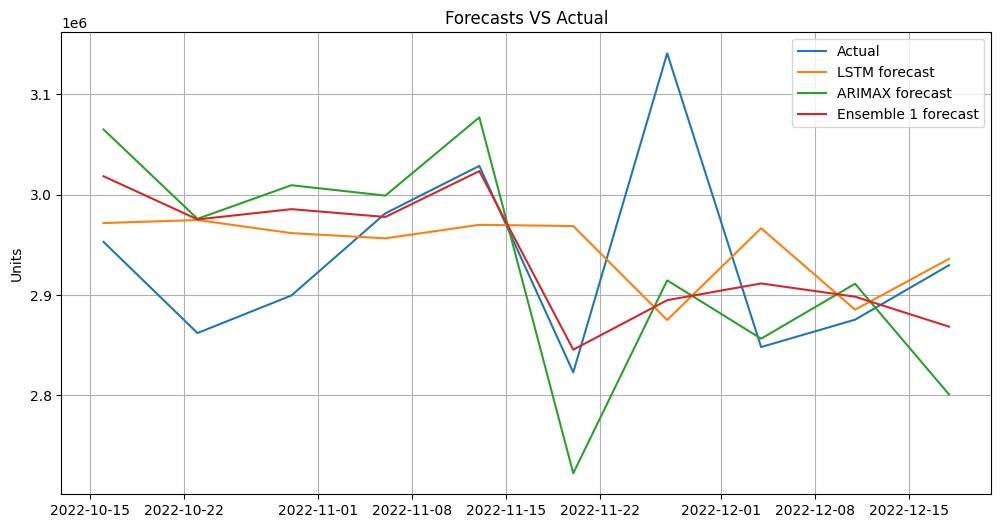

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(post_test_results['Actual'], label= 'Actual')
plt.plot(post_test_results['Test predictions'], label = 'LSTM forecast')
#plt.plot(post_test_results_gru['Test predictions_gru'], label = 'GRU forecast')
plt.plot(post_test_results_arimax['Test predictions_arimax'], label = 'ARIMAX forecast')
plt.plot(ensemble_predictions['Test predictions_ensemble'], label = 'Ensemble 1 forecast')
#plt.plot(ensemble2_predictions['Test predictions_ensemble'], label = 'Ensemble 2 forecast')
#plt.plot(ensemble3_predictions['Test predictions_ensemble'], label = 'Ensemble 3 forecast')
plt.ylabel('Units')
plt.title('Forecasts VS Actual')
plt.legend()
plt.grid(True)
plt.show()

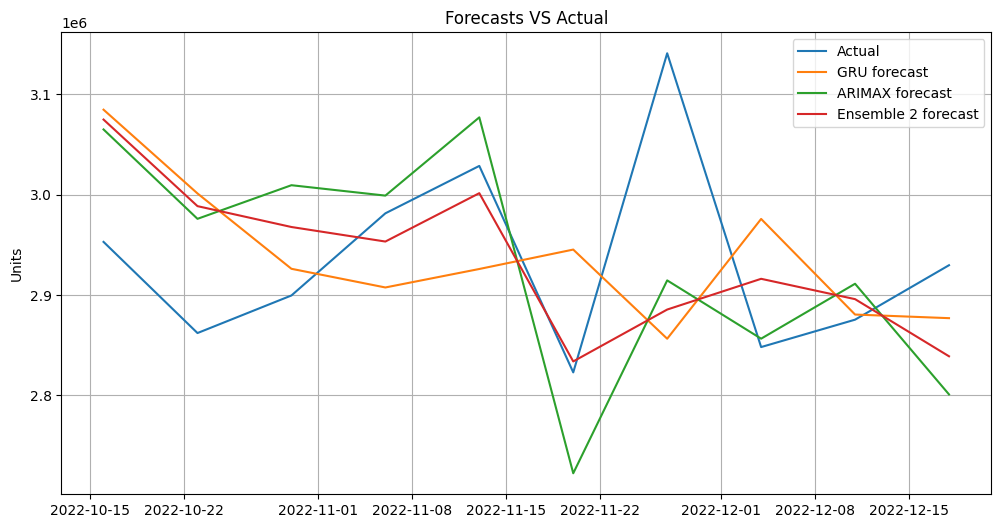

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(post_test_results['Actual'], label= 'Actual')
#plt.plot(post_test_results['Test predictions'], label = 'LSTM forecast')
plt.plot(post_test_results_gru['Test predictions_gru'], label = 'GRU forecast')
plt.plot(post_test_results_arimax['Test predictions_arimax'], label = 'ARIMAX forecast')
#plt.plot(ensemble_predictions['Test predictions_ensemble'], label = 'Ensemble 1 forecast')
plt.plot(ensemble2_predictions['Test predictions_ensemble'], label = 'Ensemble 2 forecast')
#plt.plot(ensemble3_predictions['Test predictions_ensemble'], label = 'Ensemble 3 forecast')
plt.ylabel('Units')
plt.title('Forecasts VS Actual')
plt.legend()
plt.grid(True)
plt.show()

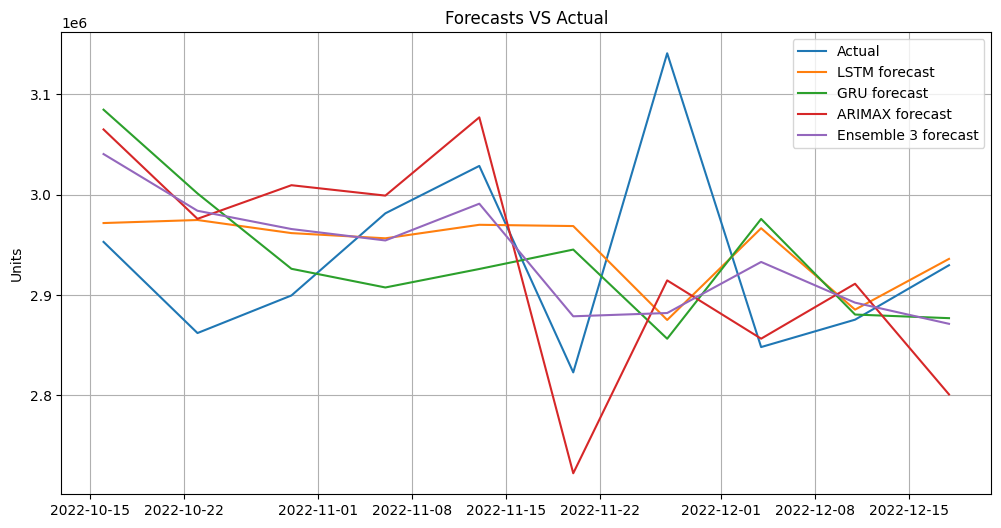

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(post_test_results['Actual'], label= 'Actual')
plt.plot(post_test_results['Test predictions'], label = 'LSTM forecast')
plt.plot(post_test_results_gru['Test predictions_gru'], label = 'GRU forecast')
plt.plot(post_test_results_arimax['Test predictions_arimax'], label = 'ARIMAX forecast')
#plt.plot(ensemble_predictions['Test predictions_ensemble'], label = 'Ensemble 1 forecast')
#plt.plot(ensemble2_predictions['Test predictions_ensemble'], label = 'Ensemble 2 forecast')
plt.plot(ensemble3_predictions['Test predictions_ensemble'], label = 'Ensemble 3 forecast')
plt.ylabel('Units')
plt.title('Forecasts VS Actual')
plt.legend()
plt.grid(True)
plt.show()